In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns 

In [3]:
def age_5(age):
    if age <= 5:
      return '00 to 05'
    elif age <= 10:
      return '06 to 10'
    elif age <= 15:
      return '11 to 15'
    elif age <= 20:
      return '16 to 20'
    elif age <= 25:
      return '21 to 25'
    elif age <= 30:
      return '26 to 30'
    elif age <= 35:
      return '31 to 35'
    elif age <= 40:
      return '36 to 40'
    elif age <= 45:
      return '41 to 45'
    elif age <= 50:
      return '46 to 50' 
    elif age <= 55:
      return '51 to 55'
    elif age <= 60:
      return '56 to 60'
    elif age <= 65:
      return '61 to 65'
    elif age <= 70:
      return '66 to 70'
    elif age <= 75:
      return '71 to 75'
    elif age <= 80:
      return '76 to 80'
    elif age <= 85:
      return '81 to 85'
    elif age <= 90:
      return '86 to 90'
    elif age <= 95:
      return '91 to 95'
    else:
      return '95 to 100'

In [4]:
def age_spec(age):
    if age <= 5:
      return '00 to 05'
    elif age <= 17:
      return '06 to 17'
    elif age <= 39:
      return '18 to 39'
    elif age <= 64:
      return '40 to 64'
    elif age <= 79:
      return '65 to 79'
    else:
      return '80 to 100'

In [5]:
def georegion(cty):
    if cty in [15, 19, 27, 43, 47, 55, 65, 71, 93] :
     return 'Central Mountains'
    elif cty in [9, 11, 17, 25, 39, 61, 63, 73, 75, 87, 89, 95, 99, 115, 121, 125]:
     return 'Eastern Plains'
    elif cty in [1, 5, 13, 14, 31, 35, 41, 59, 69, 11, 119, 123]:
     return 'Front Range'
    elif cty in [3, 21, 23, 79, 15, 19]:
     return 'San Luis Valley'
    elif cty in [7, 29, 33, 37, 45, 49, 51, 53, 57, 67, 77, 81, 83, 85, 91, 97, 13, 17, 111, 113, 117]:
     return 'Western Slope'
    else:
     return 'Colorado'


In [6]:
def genPyramid(reg, year, ageval, df_in):
    #compute data array for plotting
        df_filt = df_in.loc[(df_in['year'] == year) & (df_in['region'] == reg)]
        x_male = df_filt['male_pct']/-1
        x_female = df_filt['female_pct']
        y = df_filt[ageval]

        #plot the chart
        fig, ax = plt.subplots()
        ax1 = ax.barh(y, x_male, height=0.5)
        ax2 = ax.barh(y, x_female, height=0.5)


        ax.bar_label(ax1, labels=[f'{x*100:,.1f}%' for x in -ax1.datavalues])
        ax.bar_label(ax2, labels=[f'{x*100:,.1f}%' for x in ax2.datavalues])

        #fiinf maximum value, round up to nearest perctabe point, set axis label
        df_max = df_fin[['male_pct', 'female_pct']].round(2).max()
        maxval = df_max.max()
        
        minval = (maxval + .05) * -1
        maxval = (maxval + .05)
        plt.xlim(minval,maxval);

        ax.set_xticklabels([f'{abs(x)*100:,.1f}%'for x in ax.get_xticks()])

        #set chart title and labels
        tit_str = reg + " Age Pyramid, " + str(year)
        ax.set_title(tit_str)
        plt.ylabel("Age Category")
        plt.xlabel("Male/Female")
        #plt.annotate('Source: SDO Data', (0,0), (0, -25), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
        plt.annotate('Source: State Demography Office Estimates', (0,0), (0, -35), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)

        #adjust chart margin and layout
        plt.figure(figsize=(20,10),dpi=300)

        #show chart
        return(fig)

In [7]:
# read data
df = pd.read_csv('sya-county.csv', skiprows=1)
df['age_5'] = df.apply(lambda row: age_5(row['age']), axis=1)
df['age_spec'] = df.apply(lambda row: age_spec(row['age']), axis=1)
df['region'] = df.apply(lambda row: georegion(row['countyfips']), axis=1)


In [8]:
#Processing final dataset
df1_sum = df.groupby(['year','region','age_5'])[['malepopulation', 'femalepopulation','totalpopulation']].sum().reset_index()
df2_sum = df.groupby(['year','region'])[['malepopulation', 'femalepopulation','totalpopulation']].sum().reset_index()
df2_fin = df2_sum.rename(columns={'malepopulation': 'male_total', 'femalepopulation': 'female_total', 'totalpopulation': 'pop_total'})

df_fin = pd.merge(df1_sum, df2_fin,  how='left', left_on=['year','region'], right_on = ['year','region'])
df_fin['male_pct'] = df_fin['malepopulation']/df_fin['male_total']
df_fin['female_pct'] = df_fin['femalepopulation']/df_fin['female_total']

C:\Users\abickford\AppData\Local\Temp\ipykernel_8256\748686151.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{abs(x)*100:,.1f}%'for x in ax.get_xticks()])


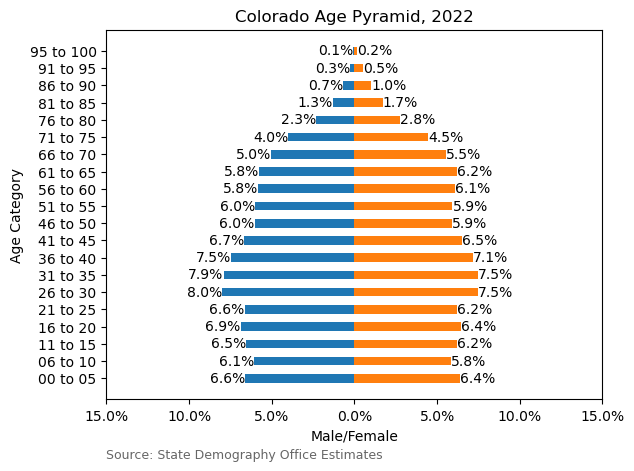

<Figure size 6000x3000 with 0 Axes>

In [9]:
  f = genPyramid('Colorado',2022,'age_5',df_fin)
  plt.show()

C:\Users\abickford\AppData\Local\Temp\ipykernel_8256\748686151.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{abs(x)*100:,.1f}%'for x in ax.get_xticks()])


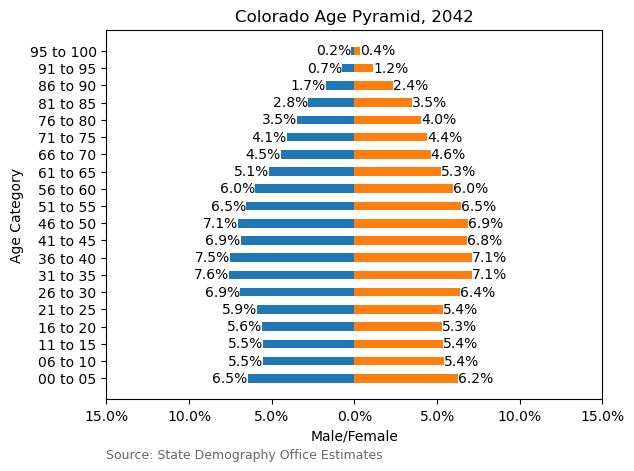

<Figure size 6000x3000 with 0 Axes>

In [10]:
  f = genPyramid('Colorado',2042,'age_5',df_fin)
  plt.show()

C:\Users\abickford\AppData\Local\Temp\ipykernel_8256\748686151.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{abs(x)*100:,.1f}%'for x in ax.get_xticks()])


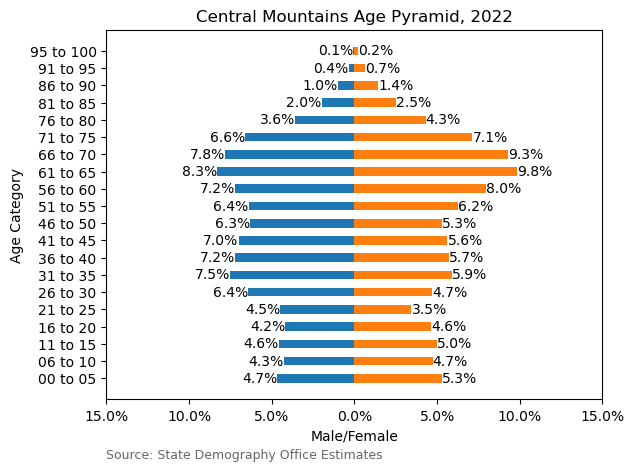

<Figure size 6000x3000 with 0 Axes>

In [11]:
  f = genPyramid('Central Mountains',2022,'age_5',df_fin)
  plt.show()

C:\Users\abickford\AppData\Local\Temp\ipykernel_8256\748686151.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{abs(x)*100:,.1f}%'for x in ax.get_xticks()])


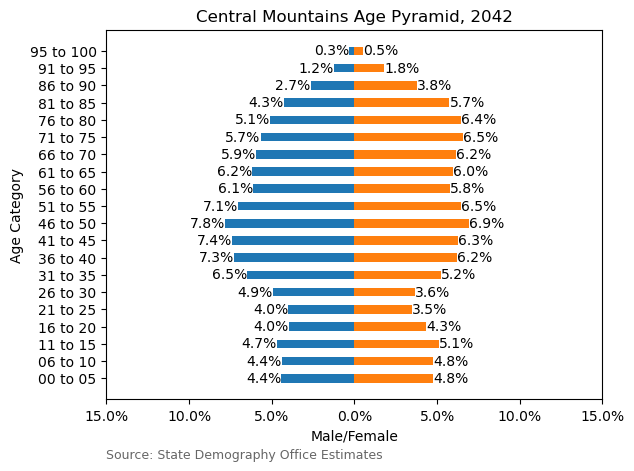

<Figure size 6000x3000 with 0 Axes>

In [12]:
  f = genPyramid('Central Mountains',2042,'age_5',df_fin)
  plt.show()

C:\Users\abickford\AppData\Local\Temp\ipykernel_8256\748686151.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{abs(x)*100:,.1f}%'for x in ax.get_xticks()])


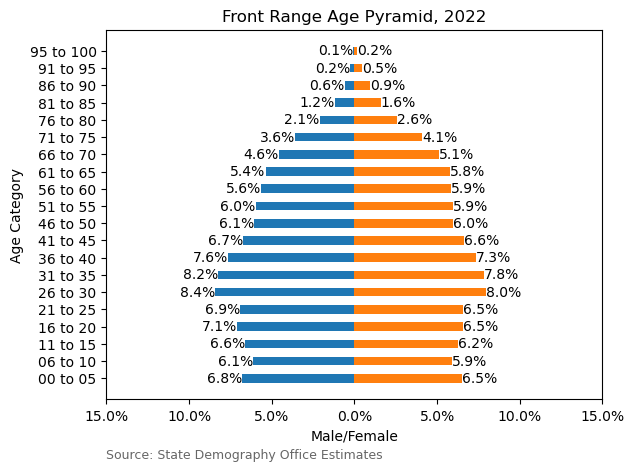

<Figure size 6000x3000 with 0 Axes>

In [13]:
  f = genPyramid('Front Range',2022,'age_5',df_fin)
  plt.show()

C:\Users\abickford\AppData\Local\Temp\ipykernel_8256\748686151.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{abs(x)*100:,.1f}%'for x in ax.get_xticks()])


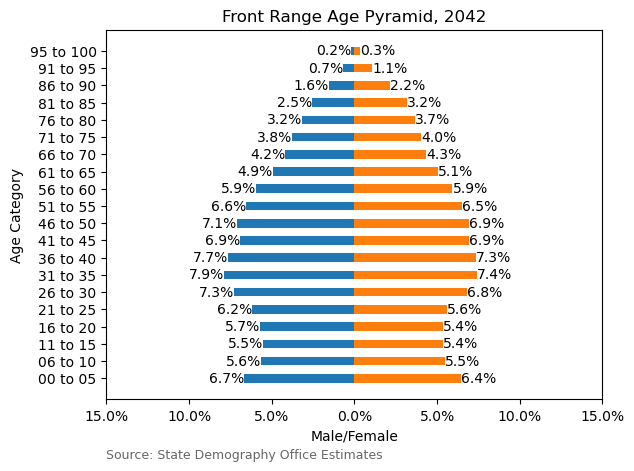

<Figure size 6000x3000 with 0 Axes>

In [14]:
  f = genPyramid('Front Range',2042,'age_5',df_fin)
  plt.show()

C:\Users\abickford\AppData\Local\Temp\ipykernel_1340\748686151.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{abs(x)*100:,.1f}%'for x in ax.get_xticks()])


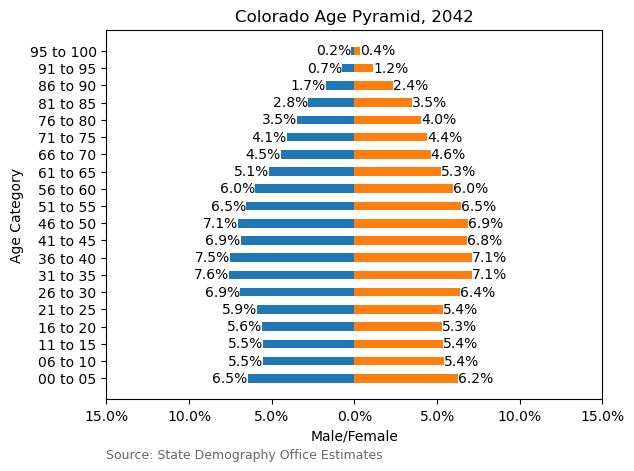

<Figure size 6000x3000 with 0 Axes>

In [9]:
  f = genPyramid('Colorado',2042,'age_5',df_fin)
  plt.show()

C:\Users\abickford\AppData\Local\Temp\ipykernel_1340\748686151.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{abs(x)*100:,.1f}%'for x in ax.get_xticks()])


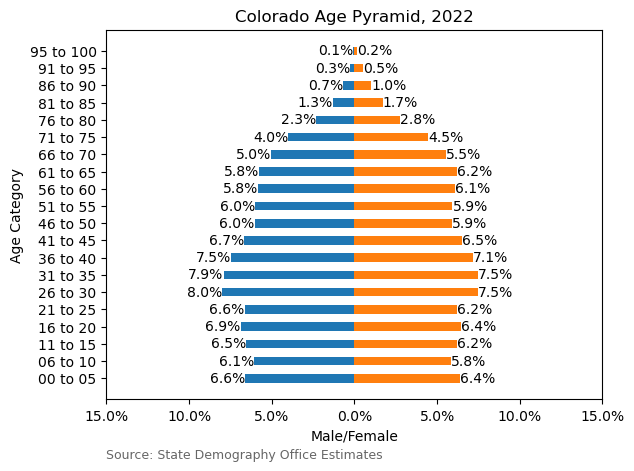

<Figure size 6000x3000 with 0 Axes>

In [10]:
  f = genPyramid('Colorado',2022,'age_5',df_fin)
  plt.show()